In [ ]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(lubridate)

In [2]:
apr <- read_csv("OD_2021_04.csv")
may <- read_csv("OD_2021_05.csv")
jun <- read_csv("OD_2021_06.csv")
jul <- read_csv("OD_2021_07.csv")
aug <- read_csv("OD_2021_08.csv")
sep <- read_csv("OD_2021_09.csv")
oct <- read_csv("OD_2021_10.csv")
stations <- read_csv("stations_10_5.csv")

Parsed with column specification:
cols(
  start_date = col_datetime(format = ""),
  emplacement_pk_start = col_double(),
  end_date = col_datetime(format = ""),
  emplacement_pk_end = col_double(),
  duration_sec = col_double(),
  is_member = col_double()
)
Parsed with column specification:
cols(
  start_date = col_datetime(format = ""),
  emplacement_pk_start = col_double(),
  end_date = col_datetime(format = ""),
  emplacement_pk_end = col_double(),
  duration_sec = col_double(),
  is_member = col_double()
)
Parsed with column specification:
cols(
  start_date = col_datetime(format = ""),
  emplacement_pk_start = col_double(),
  end_date = col_datetime(format = ""),
  emplacement_pk_end = col_double(),
  duration_sec = col_double(),
  is_member = col_double()
)
Parsed with column specification:
cols(
  start_date = col_datetime(format = ""),
  emplacement_pk_start = col_double(),
  end_date = col_datetime(format = ""),
  emplacement_pk_end = col_double(),
  duration_sec = col_double(

In [3]:
consolidated = rbind(apr,may,jun,jul,aug,sep,oct)

In [4]:
total_number_of_trips <- length(consolidated$start_date)

In [16]:
total_number_of_trips

[1] 5225536

In [5]:
consolidated %>% 
  drop_na() %>% 
  count(is_member) %>% 
  mutate(percent = n/sum(n)) %>% 
  rename(count = n)

is_member,count,percent
0,918022,0.1756803
1,4307505,0.8243197


In [7]:
consolidated$route <- paste(consolidated$emplacement_pk_start, consolidated$emplacement_pk_end, sep= "-")

In [8]:
#top 10 most popular routes overall
top_routes <- consolidated %>% 
  count(route) %>% 
  arrange(desc(n)) %>% 
  top_n(10) %>% 
  rename(count = n) %>% 
  ggplot(., aes(x=route,y=count))+
  geom_col(fill="dodgerblue")

Selecting by n


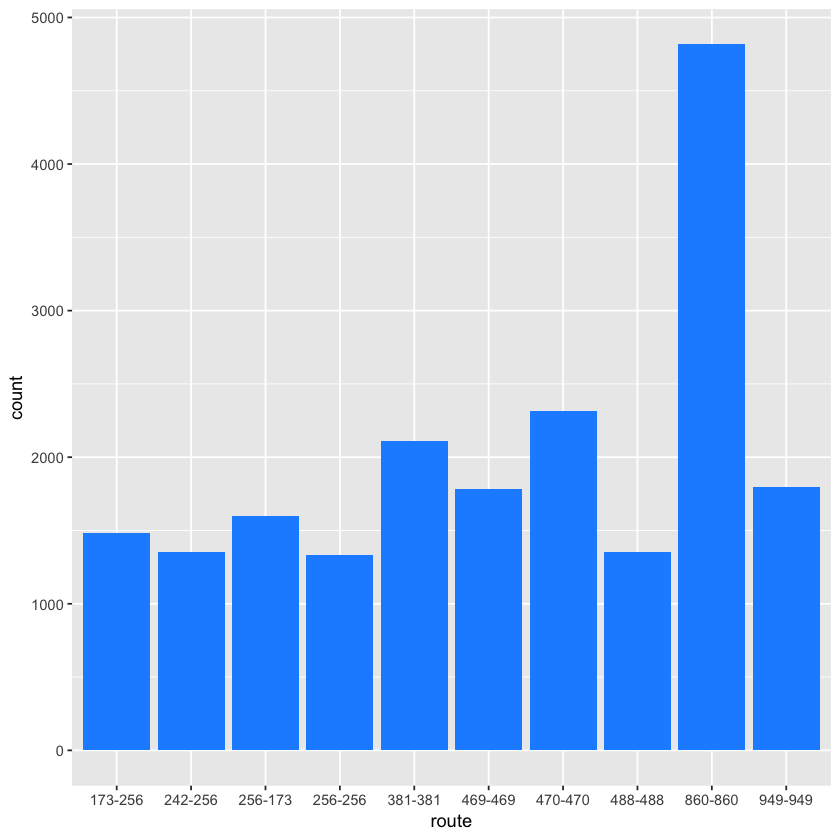

In [9]:
top_routes

In [10]:
#top 10 most popular routes among members
top_routes_members <- consolidated %>% 
  filter(is_member == 1) %>% 
  count(route) %>% 
  arrange(desc(n)) %>% 
  top_n(10)

Selecting by n


In [11]:
top_routes_members

route,n
381-381,2020
860-860,1791
949-949,1693
256-173,1462
173-256,1340
242-256,1233
207-214,1225
256-256,1208
688-143,1166
207-216,1111


In [12]:
#top 10 most popular routes among occasional riders
top_routes_occasional <- consolidated %>% 
  filter(is_member == 0) %>% 
  count(route) %>% 
  arrange(desc(n)) %>% 
  top_n(10)

Selecting by n


In [13]:
top_routes_occasional

route,n
860-860,3025
470-470,1577
469-469,1203
471-471,678
469-470,634
76-76,573
488-488,556
628-860,516
469-532,452
532-469,435


In [14]:
# Usage variation by weekday & month
weekday_month <- consolidated %>% 
  count(day = wday(start_date, label = TRUE),
        month = month(start_date, label = TRUE),
        name = "Count") %>% 
  ggplot() +
  geom_tile(aes(x = day, y = factor(month), fill = Count)) +
  labs(x = "Day", y = "month") +
  guides(fill = guide_colorbar(title = "Count")) +
  theme_classic() +
  scale_fill_viridis_c()

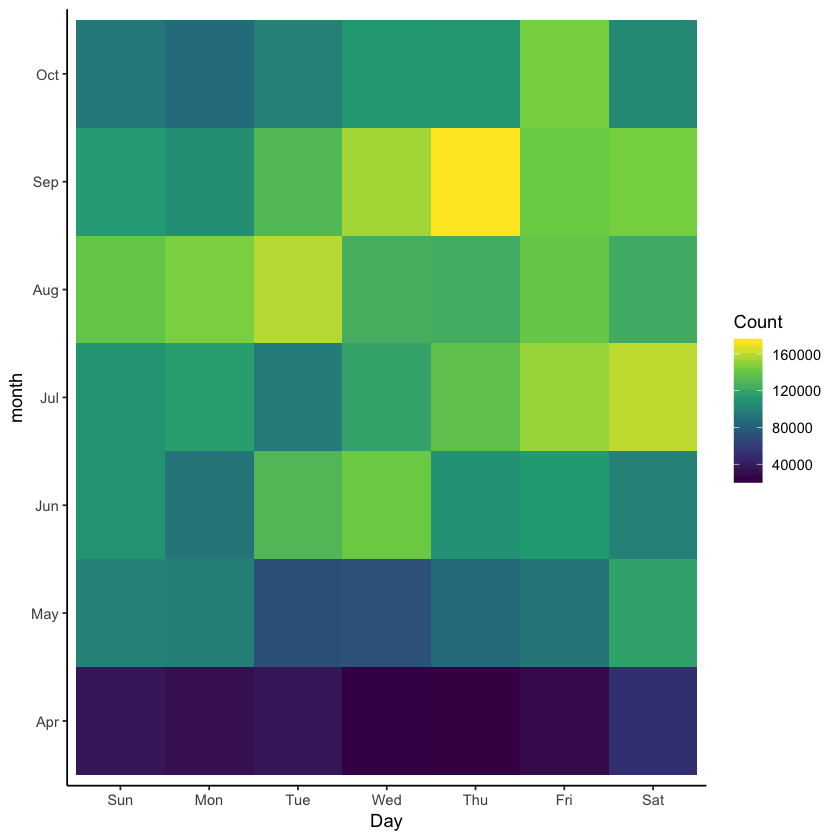

In [15]:
weekday_month